<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/NaiveBayes_SupportVectorMachine/Ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex-5
Akritidis Polydoros



#Importing Libraries

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from scipy.stats import norm

In [ ]:
!pip install tabulate
from tabulate import tabulate


#Importing the Dataset

In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Plot the bar for occupation of people suffer from Insomnia

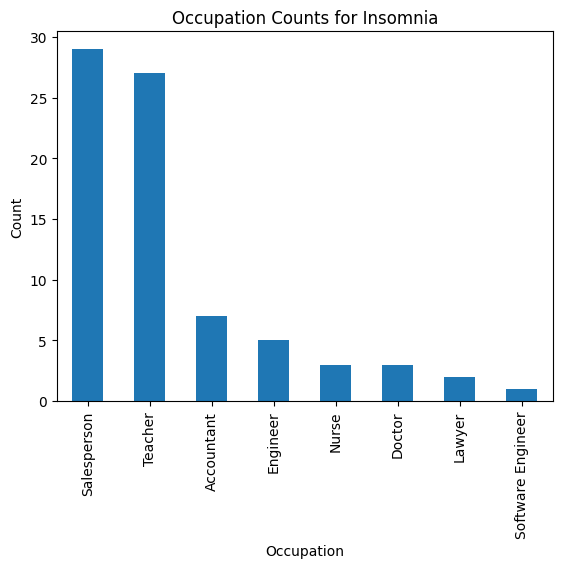

In [ ]:
insomnia_count = df[df['Sleep Disorder'] == 'Insomnia']['Occupation'].value_counts()
insomnia_count.plot(kind='bar')
plt.title('Occupation Counts for Insomnia')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

Print the occupation that doesn't suffer from sleep disorder the most

In [ ]:
none_count = df[df['Sleep Disorder'] == 'None']['Occupation'].value_counts()
max_label = none_count.idxmax()
max_count = none_count.max()

print(f"Max Sleep Disorder = None is {max_label}, with count {max_count}")

Max Sleep Disorder = None is Doctor, with count 64


Plot a bar for male and female insances with their sleep disorder side to side.

<ipython-input-50-345db5fa2ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insomnia_counts.loc[:, 'Total'] = insomnia_counts.groupby(['Gender'])['Sleep Disorder'].transform('count')


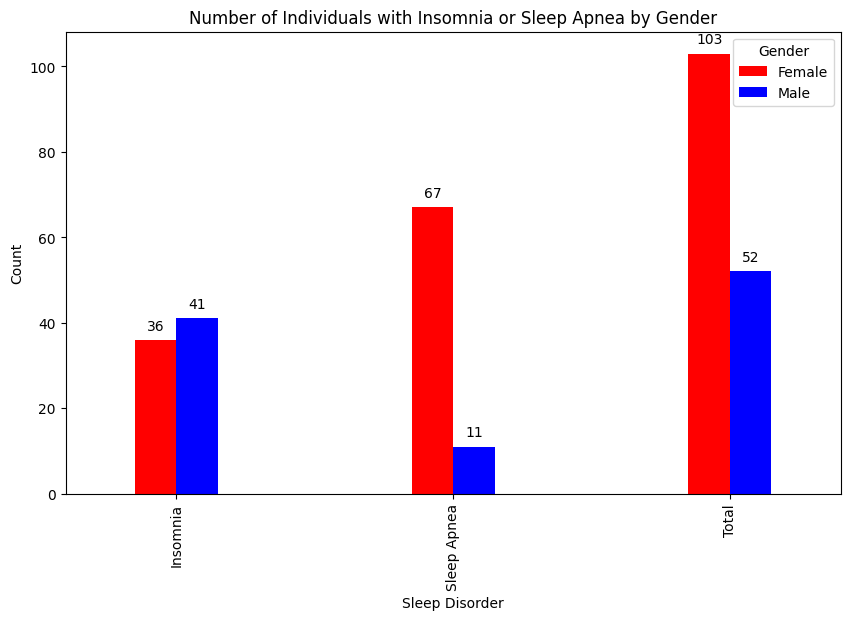

In [ ]:
insomnia_counts = df[df['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]

insomnia_counts.loc[:, 'Total'] = insomnia_counts.groupby(['Gender'])['Sleep Disorder'].transform('count')

grouped_df = insomnia_counts.groupby(['Sleep Disorder', 'Gender']).size().unstack()

total_count = insomnia_counts.groupby('Gender')['Total'].first().reset_index()
total_count.set_index('Gender', inplace=True)
grouped_df.loc['Total'] = total_count['Total']


ax = grouped_df.plot(kind='bar', width=0.3, figsize=(10, 6), color=['Red', 'Blue', 'Green'])
ax.set_title('Number of Individuals with Insomnia or Sleep Apnea by Gender')
ax.set_xlabel('Sleep Disorder')
ax.set_ylabel('Count')
ax.legend(title='Gender', bbox_to_anchor=(1, 1))


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


The reuslts of this dataset will not be very good because there is inbalance in the dataset for every sleep disorder. The female count is almost double as the male count.

Plot a bar plot with counts of Sleep disorder column

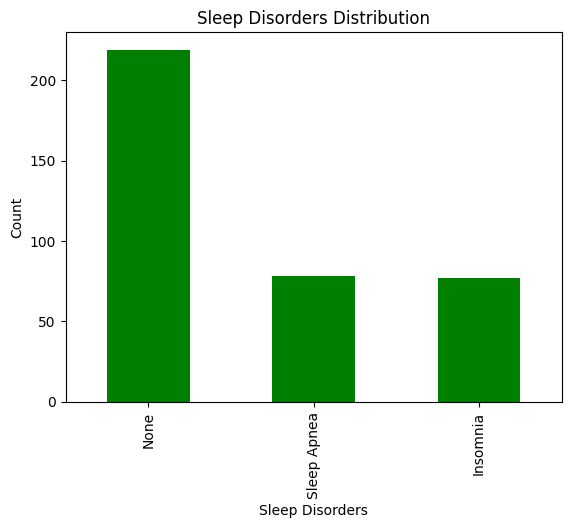

In [ ]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()


sleep_disorder_counts.plot(kind='bar', color='Green')

plt.xlabel('Sleep Disorders')
plt.ylabel('Count')
plt.title('Sleep Disorders Distribution')


plt.show()

#Data Pre-Processing

One-hot encode 'BMI Category' and 'Occupation'

In [ ]:
df_encoded = pd.get_dummies(df, columns=['BMI Category', 'Occupation'])

Swap male with 0 and female with 1 values

In [ ]:
df_encoded['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

Swap Sleep disorder values with None=0, Insomnia=1, Sleep Apnea=2

In [ ]:
df_encoded['Sleep Disorder'] = df['Sleep Disorder'].replace({'None':0, 'Insomnia':1, 'Sleep Apnea':2})

Drop person id because there is no need to keep it in the dataset as it is an increasing number

In [ ]:
df_encoded.drop('Person ID', axis=1, inplace=True)

Blood Pressure has to be split to Systolic and Diastolic or else it won't be able to be processed by the model

In [ ]:
df_encoded[['Systolic', 'Diastolic']] = df_encoded['Blood Pressure'].str.split('/', expand=True)

# Convert the values to numeric
df_encoded['Systolic'] = pd.to_numeric(df_encoded['Systolic'])
df_encoded['Diastolic'] = pd.to_numeric(df_encoded['Diastolic'])

df_encoded.drop('Blood Pressure', axis =1 , inplace = True)

Have an overview of the final Dataset

In [ ]:
df_encoded

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic,Diastolic
0,0,27,6.1,6,42,6,77,4200,0,0,...,0,0,0,0,0,0,1,0,126,83
1,0,28,6.2,6,60,8,75,10000,0,1,...,0,0,0,0,0,0,0,0,125,80
2,0,28,6.2,6,60,8,75,10000,0,1,...,0,0,0,0,0,0,0,0,125,80
3,0,28,5.9,4,30,8,85,3000,2,0,...,0,0,0,1,0,0,0,0,140,90
4,0,28,5.9,4,30,8,85,3000,2,0,...,0,0,0,1,0,0,0,0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,2,0,...,0,0,1,0,0,0,0,0,140,95
370,1,59,8.0,9,75,3,68,7000,2,0,...,0,0,1,0,0,0,0,0,140,95
371,1,59,8.1,9,75,3,68,7000,2,0,...,0,0,1,0,0,0,0,0,140,95
372,1,59,8.1,9,75,3,68,7000,2,0,...,0,0,1,0,0,0,0,0,140,95


#Classification with Naive Bayes and Support Vector Machines

Split the dataset to target and features and keep their names in case of need.

In [ ]:
target_column = "Sleep Disorder"
y = df_encoded[target_column].to_numpy()

dataset_rows = y.shape[0]

fn= df_encoded.drop(columns=target_column)
feature_names=fn.columns
x = df_encoded.drop(columns= target_column).to_numpy()

scaler = MinMaxScaler()

x = scaler.fit_transform (x)


Split the dataset to train and test with 0.3 ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Train the Naive Bayes classifier and print it's micro and macro metrics score

In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)

predictions_nb = clf.predict(x_test)
accuracy_nb = accuracy_score(y_test, predictions_nb)
precision_micro_nb = precision_score(y_test, predictions_nb, average='micro')
recall_micro_nb = recall_score(y_test, predictions_nb, average='micro')
f1_micro_nb = f1_score(y_test, predictions_nb, average='micro')

precision_macro_nb = precision_score(y_test, predictions_nb, average='macro')
recall_macro_nb = recall_score(y_test, predictions_nb, average='macro')
f1_macro_nb = f1_score(y_test, predictions_nb, average='macro')

table_data_nb = [
    ['Metric', 'Micro', 'Macro'],
    ['Accuracy', accuracy_nb, accuracy_nb],
    ['Precision', precision_micro_nb, precision_macro_nb],
    ['Recall', recall_micro_nb, recall_macro_nb],
    ['F1 Score', f1_micro_nb, f1_macro_nb],
]

print("Naive Bayes")
print(tabulate(table_data_nb, headers='firstrow', tablefmt='fancy_grid'))


Naive Bayes
╒═══════════╤══════════╤══════════╕
│ Metric    │    Micro │    Macro │
╞═══════════╪══════════╪══════════╡
│ Accuracy  │ 0.876106 │ 0.876106 │
├───────────┼──────────┼──────────┤
│ Precision │ 0.876106 │ 0.850205 │
├───────────┼──────────┼──────────┤
│ Recall    │ 0.876106 │ 0.846728 │
├───────────┼──────────┼──────────┤
│ F1 Score  │ 0.876106 │ 0.847475 │
╘═══════════╧══════════╧══════════╛


In [ ]:
print("Classification Report for Naive Baynes:")
print(classification_report(y_test, predictions_nb))

Classification Report for Naive Baynes:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.86      0.78      0.82        23
           2       0.77      0.83      0.80        24

    accuracy                           0.88       113
   macro avg       0.85      0.85      0.85       113
weighted avg       0.88      0.88      0.88       113



The classification report presents key metrics such as precision, recall, F1-score, and support (indicating the actual occurrences of each class) for each target. Additionally, it furnishes the macro-average, which calculates the unweighted mean of these metrics across all classes, and the weighted/micro average, providing a weighted mean that takes into account the class imbalance.

Print the confusion matrix and explain it

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, predictions_nb)
print("Confusion Matrix:")
print (conf_matrix_nb)

Confusion Matrix:
[[61  2  3]
 [ 2 18  3]
 [ 3  1 20]]


For class 0:
*   TP = 61
*   TN = 18+20+3+1
*   FP = 2+3
*   FN = 2+3

For class 1
*   TP = 18
*   TN = 61+20+3+3
*   FP = 2+1
*   FN = 2+3

For class 2
*   TP = 20
*   TN = 61+18+2+2
*   FP = 3+3
*   FN = 3+1



TN of class 0 represents the cases where the model gets it right by correctly identifying instances that are not part of the class 0, but 1 or 2

TP of class 0 represents the cases where the model gets it right by correctly identifying instances that are part of the class 0

FN  of class 0 represents the cases where the model gets it wrong by mistakenly identifying instances that are not part of the class 0

FP of class 0 represents the cases where the model gets it wrong by mistakenly identifying instances that are part of the class 0

Same for classes 1 and 2


More True Positives has the class 0 and more False Positives the class 2 that have 6

Train the support vector classifier and print the micro and macro metrics

In [ ]:
svc_classifier = SVC(probability=True, random_state=0)


svc_classifier.fit(x_train, y_train)


predictions_svc = svc_classifier.predict(x_test)

accuracy_svc = accuracy_score(y_test, predictions_svc)
precision_micro_svc = precision_score(y_test, predictions_svc, average='micro')
recall_micro_svc = recall_score(y_test, predictions_svc, average='micro')
f1_micro_svc = f1_score(y_test, predictions_svc, average='micro')

precision_macro_svc = precision_score(y_test, predictions_svc, average='macro')
recall_macro_svc = recall_score(y_test, predictions_svc, average='macro')
f1_macro_svc = f1_score(y_test, predictions_svc, average='macro')

table_data_svc = [
    ['Metric', 'Micro', 'Macro'],
    ['Accuracy', accuracy_svc, accuracy_svc],
    ['Precision', precision_micro_svc, precision_macro_svc],
    ['Recall', recall_micro_svc, recall_macro_svc],
    ['F1 Score', f1_micro_svc, f1_macro_svc],
]

print ("Support Vector Classifier")
print(tabulate(table_data_svc, headers='firstrow', tablefmt='fancy_grid'))



Support Vector Classifier
╒═══════════╤══════════╤══════════╕
│ Metric    │    Micro │    Macro │
╞═══════════╪══════════╪══════════╡
│ Accuracy  │ 0.893805 │ 0.893805 │
├───────────┼──────────┼──────────┤
│ Precision │ 0.893805 │ 0.872316 │
├───────────┼──────────┼──────────┤
│ Recall    │ 0.893805 │ 0.856829 │
├───────────┼──────────┼──────────┤
│ F1 Score  │ 0.893805 │ 0.863938 │
╘═══════════╧══════════╧══════════╛


In [ ]:
print("Classification Report for SVC:")
print(classification_report(y_test, predictions_svc))

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.86      0.78      0.82        23
           2       0.83      0.83      0.83        24

    accuracy                           0.89       113
   macro avg       0.87      0.86      0.86       113
weighted avg       0.89      0.89      0.89       113



The classification report is explained above

Print the confusion matrix

In [ ]:
conf_matrix_svc = confusion_matrix(y_test, predictions_svc)
print("Confusion Matrix:")
print (conf_matrix_svc)

Confusion Matrix:
[[63  2  1]
 [ 2 18  3]
 [ 3  1 20]]


The 3x3 confusion Matrix is explained above

More True Positives has class 0 with 63 and more False Positives again 0 with 5

#Calibration

Use Sleeping Apnea and Insomnia as Sleeping Disorders

In [ ]:
df_calibration = df_encoded.copy()
df_calibration['Sleep Disorder'] = df_calibration['Sleep Disorder'].replace(2, 1)

Plot the new counts of the target of the dataset

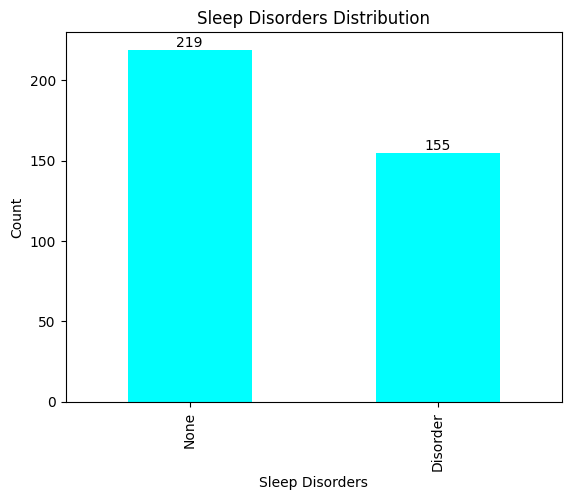

In [ ]:
sleep_disorder_counts = df_calibration['Sleep Disorder'].value_counts()

sleep_disorder_counts.index = sleep_disorder_counts.index.map({0: 'None', 1: 'Disorder'})

ax = sleep_disorder_counts.plot(kind='bar', color='Cyan')

for i, v in enumerate(sleep_disorder_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Sleep Disorders')
plt.ylabel('Count')
plt.title('Sleep Disorders Distribution')

plt.show()

As we can see the dataset is imbalanced but not as much as before. Now the None class is only 1.4 times bigger than the disorder.

Split the dataset in target and features and scale the dataset

In [ ]:
target_column = "Sleep Disorder"
y_cal = df_calibration[target_column].to_numpy()

dataset_rows = y_cal.shape[0]

fn= df_calibration.drop(columns=target_column)
feature_names=fn.columns
x_cal = df_calibration.drop(columns= target_column).to_numpy()

scaler = MinMaxScaler()

x_cal = scaler.fit_transform (x_cal)


Split the dataset into test and train

In [ ]:
x_train_cal, x_test_cal, y_train_cal, y_test_cal = train_test_split(x_cal, y_cal, test_size=0.3, random_state=0)

Keep the five first values of the x_test and y_test

In [ ]:
x_test_subset = x_test_cal[:5]
y_test_subset = y_test_cal[:5]

Train again the SVC and Naive Bayes with the new dataset

In [ ]:
clf.fit(x_train_cal, y_train_cal)
svc_classifier.fit(x_train_cal, y_train_cal)

nb_proba = clf.predict_proba(x_test_subset)
svc_proba = svc_classifier.predict_proba(x_test_subset)

Print the table with the probabilities of the instance to belong in the target.

In [ ]:
x_test_ids = range(0, len(x_test_subset) )

proba_clf = clf.predict_proba(x_test_subset)
proba_svc = svc_classifier.predict_proba(x_test_subset)

y_pred_clf = clf.predict(x_test_subset)
y_pred_svc = svc_classifier.predict(x_test_subset)

# Creating a list of rows for the table
table_data = []

for i, x_test_id in enumerate(x_test_ids):
    row = [x_test_id, 'Gaussian Naive Bayes', proba_clf[i, 0], proba_clf[i, 1], y_pred_clf[i]]
    table_data.append(row)

    row = [x_test_id, 'Support Vector Classifier', proba_svc[i, 0], proba_svc[i, 1], y_pred_svc[i]]
    table_data.append(row)

# Creating the table using tabulate
headers = ['x_test_id', 'Classifier', 'None Prob', 'Disorder Prob', 'y-pred']
table = tabulate(table_data, headers=headers, tablefmt='fancy_grid')

# Printing the table
print(table)

╒═════════════╤═══════════════════════════╤═════════════╤═════════════════╤══════════╕
│   x_test_id │ Classifier                │   None Prob │   Disorder Prob │   y-pred │
╞═════════════╪═══════════════════════════╪═════════════╪═════════════════╪══════════╡
│           0 │ Gaussian Naive Bayes      │  1          │     9.91447e-18 │        0 │
├─────────────┼───────────────────────────┼─────────────┼─────────────────┼──────────┤
│           0 │ Support Vector Classifier │  0.944732   │     0.0552678   │        0 │
├─────────────┼───────────────────────────┼─────────────┼─────────────────┼──────────┤
│           1 │ Gaussian Naive Bayes      │  2.6244e-11 │     1           │        1 │
├─────────────┼───────────────────────────┼─────────────┼─────────────────┼──────────┤
│           1 │ Support Vector Classifier │  0.103377   │     0.896623    │        1 │
├─────────────┼───────────────────────────┼─────────────┼─────────────────┼──────────┤
│           2 │ Gaussian Naive Bayes      │

Calculate and print the Accuracies of the two classifiers

In [ ]:
y_pred_cal_nb = clf.predict (x_test_cal)
y_pred_cal_svc = svc_classifier.predict (x_test_cal)
nb_cm = confusion_matrix (y_pred_cal_nb, y_test_cal)
svc_cm = confusion_matrix (y_pred_cal_svc, y_test_cal)

print(f"Accuracy for NB : {accuracy_score(y_pred_cal_nb, y_test_cal)}")
print(f"Accuracy for SVC : {accuracy_score(y_pred_cal_svc, y_test_cal)}")

Accuracy for NB : 0.911504424778761
Accuracy for SVC : 0.9026548672566371


Print the confusion matrix of the Naive Bayes classifier and explain its values

In [ ]:
tp_none_nb = nb_cm[0, 0]
tn_none_nb = nb_cm[1, 1]
fp_none_nb = nb_cm[1, 0]
fn_none_nb = nb_cm[0, 1]

tp_disorder_nb = nb_cm[1, 1]
tn_disorder_nb = nb_cm[0, 0]
fp_disorder_nb = nb_cm[0, 1]
fn_disorder_nb = nb_cm[1, 0]

print("Values for Naive Bayes:")
print(f"True Positives (None): {tp_none_nb}")
print(f"True Negatives (None): {tn_none_nb}")
print(f"False Positives (None): {fp_none_nb}")
print(f"False Negatives (None): {fn_none_nb}")
print()
print(f"True Positives (Sleep Disorder): {tp_disorder_nb}")
print(f"True Negatives (Sleep Disorder): {tn_disorder_nb}")
print(f"False Positives (Sleep Disorder): {fp_disorder_nb}")
print(f"False Negatives (Sleep Disorder): {fn_disorder_nb}")

class_labels = ["None", "Sleep Disorder"]

nb_cm_table = nb_cm.tolist()


print(tabulate(nb_cm_table, headers= class_labels,  tablefmt="fancy_grid"))

Values for Naive Bayes:
True Positives (None): 63
True Negatives (None): 40
False Positives (None): 3
False Negatives (None): 7

True Positives (Sleep Disorder): 40
True Negatives (Sleep Disorder): 63
False Positives (Sleep Disorder): 7
False Negatives (Sleep Disorder): 3
╒════════╤══════════════════╕
│   None │   Sleep Disorder │
╞════════╪══════════════════╡
│     63 │                7 │
├────────┼──────────────────┤
│      3 │               40 │
╘════════╧══════════════════╛


Print the confusion matrix of the Support Vector classifier and explain its values

In [ ]:
tp_none_svc = svc_cm[0, 0]
tn_none_svc = svc_cm[1, 1]
fp_none_svc = svc_cm[1, 0]
fn_none_svc = svc_cm[0, 1]

tp_disorder_svc = svc_cm[1, 1]
tn_disorder_svc = svc_cm[0, 0]
fp_disorder_svc = svc_cm[0, 1]
fn_disorder_svc = svc_cm[1, 0]

print("Values for Support Vector Classifier:")
print(f"True Positives (None): {tp_none_svc}")
print(f"True Negatives (None): {tn_none_svc}")
print(f"False Positives (None): {fp_none_svc}")
print(f"False Negatives (None): {fn_none_svc}")
print()
print(f"True Positives (Sleep Disorder): {tp_disorder_svc}")
print(f"True Negatives (Sleep Disorder): {tn_disorder_svc}")
print(f"False Positives (Sleep Disorder): {fp_disorder_svc}")
print(f"False Negatives (Sleep Disorder): {fn_disorder_svc}")

class_labels = ["None", "Sleep Disorder"]

svc_cm_table = svc_cm.tolist()

print(tabulate(svc_cm_table, headers=class_labels, tablefmt="fancy_grid"))


Values for Support Vector Classifier:
True Positives (None): 60
True Negatives (None): 42
False Positives (None): 6
False Negatives (None): 5

True Positives (Sleep Disorder): 42
True Negatives (Sleep Disorder): 60
False Positives (Sleep Disorder): 5
False Negatives (Sleep Disorder): 6
╒════════╤══════════════════╕
│   None │   Sleep Disorder │
╞════════╪══════════════════╡
│     60 │                5 │
├────────┼──────────────────┤
│      6 │               42 │
╘════════╧══════════════════╛


Let's try to put a threshold of 0.3 in the probability to belong in the none class for both classifiers

In [ ]:
y_prob_nb = clf.predict_proba(x_test_cal)
y_prob_svc =svc_classifier.predict_proba(x_test_cal)

new_threshold = 0.3

y_pred_cal_nb_new_threshold = (y_prob_nb[:, 1] >= new_threshold).astype(int)
y_pred_cal_svc_new_threshold = (y_prob_svc[:, 1] >= new_threshold).astype(int)

print(f"Accuracy with new threshold for NB : {accuracy_score(y_pred_cal_nb_new_threshold, y_test_cal)}")
print(f"Accuracy with old threshold for NB : {accuracy_score(y_pred_cal_nb, y_test_cal)}")

print(f"Accuracy with new threshold for SVC : {accuracy_score(y_pred_cal_svc_new_threshold, y_test_cal)}")
print(f"Accuracy with old threshold for SVC : {accuracy_score(y_pred_cal_svc, y_test_cal)}")


Accuracy with new threshold for NB : 0.911504424778761
Accuracy with old threshold for NB : 0.911504424778761
Accuracy with new threshold for SVC : 0.8849557522123894
Accuracy with old threshold for SVC : 0.9026548672566371


Calculate the new confusion matrices

In [ ]:
nb_new_cm = confusion_matrix (y_pred_cal_nb_new_threshold, y_test_cal)
svc_new_cm = confusion_matrix (y_pred_cal_svc_new_threshold, y_test_cal)

Print the confusion matrix of the Naive Bayes and its accuracy

In [ ]:
print ("For Naive Bayes Classifier new Threshold")
print()
print(f"Accuracy with new threshold for NB : {accuracy_score(y_pred_cal_nb_new_threshold, y_test_cal)}")
print()
tp_none_nb_new = nb_new_cm[0, 0]
tn_none_nb_new = nb_new_cm[1, 1]
fp_none_nb_new = nb_new_cm[1, 0]
fn_none_nb_new = nb_new_cm[0, 1]

tp_disorder_nb_new = nb_new_cm[1, 1]
tn_disorder_nb_new = nb_new_cm[0, 0]
fp_disorder_nb_new = nb_new_cm[0, 1]
fn_disorder_nb_new = nb_new_cm[1, 0]

class_labels = ["None", "Sleep Disorder"]

nb_new_cm_table = nb_new_cm.tolist()


print(tabulate(nb_new_cm_table, headers= class_labels,  tablefmt="fancy_grid"))

print(f"True Positives (None): {tp_none_nb_new}")
print(f"True Negatives (None): {tn_none_nb_new}")
print(f"False Positives (None): {fp_none_nb_new}")
print(f"False Negatives (None): {fn_none_nb_new}")
print()
print(f"True Positives (Sleep Disorder): {tp_disorder_nb_new}")
print(f"True Negatives (Sleep Disorder): {tn_disorder_nb_new}")
print(f"False Positives (Sleep Disorder): {fp_disorder_nb_new}")
print(f"False Negatives (Sleep Disorder): {fn_disorder_nb_new}")


For Naive Bayes Classifier new Threshold

Accuracy with new threshold for NB : 0.911504424778761

╒════════╤══════════════════╕
│   None │   Sleep Disorder │
╞════════╪══════════════════╡
│     63 │                7 │
├────────┼──────────────────┤
│      3 │               40 │
╘════════╧══════════════════╛
True Positives (None): 63
True Negatives (None): 40
False Positives (None): 3
False Negatives (None): 7

True Positives (Sleep Disorder): 40
True Negatives (Sleep Disorder): 63
False Positives (Sleep Disorder): 7
False Negatives (Sleep Disorder): 3


Print the confusion matrix of the Naive Bayes and its accuracy

In [ ]:
print ("For Support Vector Classifier new Threshold")
print()
print(f"Accuracy with new threshold for SVC : {accuracy_score(y_pred_cal_svc_new_threshold, y_test_cal)}")
print()
tp_none_svc_new = svc_new_cm[0, 0]
tn_none_svc_new = svc_new_cm[1, 1]
fp_none_svc_new = svc_new_cm[1, 0]
fn_none_svc_new = svc_new_cm[0, 1]

tp_disorder_svc_new = svc_new_cm[1, 1]
tn_disorder_svc_new = svc_new_cm[0, 0]
fp_disorder_svc_new = svc_new_cm[0, 1]
fn_disorder_svc_new = svc_new_cm[1, 0]

class_labels_svc = ["None", "Sleep Disorder"]

svc_new_cm_table = svc_new_cm.tolist()

print(tabulate(svc_new_cm_table, headers=class_labels_svc, tablefmt="fancy_grid"))

print(f"True Positives (None): {tp_none_svc_new}")
print(f"True Negatives (None): {tn_none_svc_new}")
print(f"False Positives (None): {fp_none_svc_new}")
print(f"False Negatives (None): {fn_none_svc_new}")
print()
print(f"True Positives (Sleep Disorder): {tp_disorder_svc_new}")
print(f"True Negatives (Sleep Disorder): {tn_disorder_svc_new}")
print(f"False Positives (Sleep Disorder): {fp_disorder_svc_new}")
print(f"False Negatives (Sleep Disorder): {fn_disorder_svc_new}")


For Support Vector Classifier new Threshold

Accuracy with new threshold for SVC : 0.8849557522123894

╒════════╤══════════════════╕
│   None │   Sleep Disorder │
╞════════╪══════════════════╡
│     58 │                5 │
├────────┼──────────────────┤
│      8 │               42 │
╘════════╧══════════════════╛
True Positives (None): 58
True Negatives (None): 42
False Positives (None): 8
False Negatives (None): 5

True Positives (Sleep Disorder): 42
True Negatives (Sleep Disorder): 58
False Positives (Sleep Disorder): 5
False Negatives (Sleep Disorder): 8


Plot the ROC curve for both classifiers

ROC for Naive Bayes


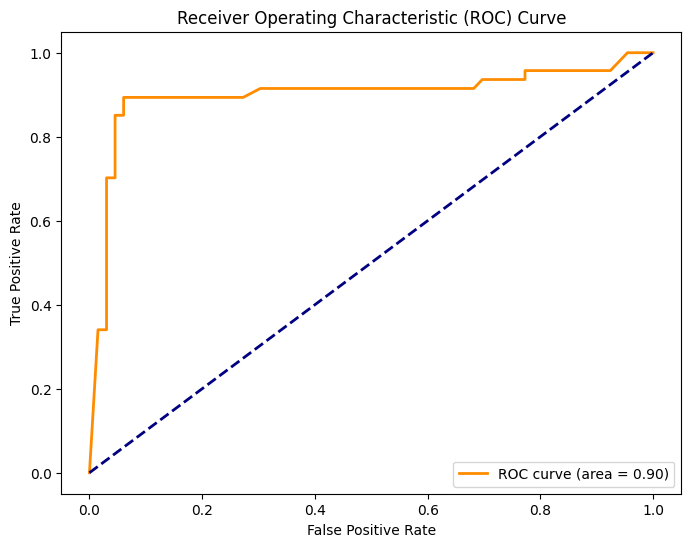

In [ ]:
print ("ROC for Naive Bayes")


y_scores_nb = clf.predict_proba(x_test_cal)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_cal, y_scores_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC for SVC


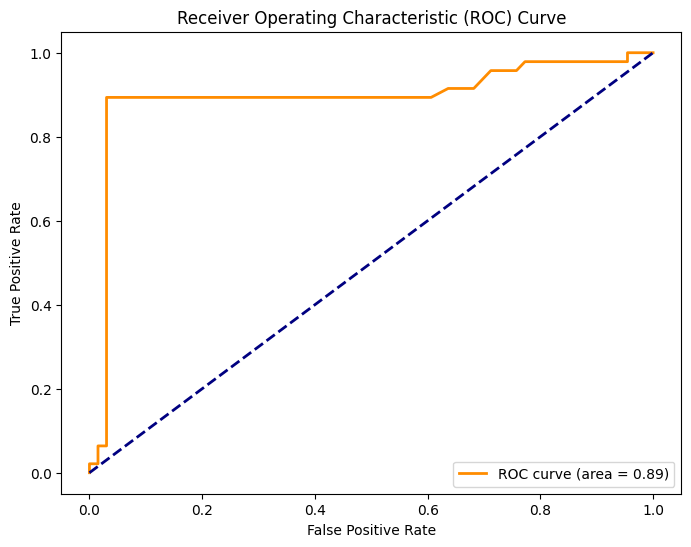

In [ ]:
print ("ROC for SVC")

y_scores_svc = svc_classifier.predict_proba(x_test_cal)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_cal, y_scores_svc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Looking at the ROC curves, changing the threshold a bit doesn't seem to make a big difference in the trade-off between catching true positives and avoiding false positives, unless it goes to a very small value. For the SVC it won't change except if it goes near to 0 and for NB the change is minor. Let's change the threshold to 0.1 to check my assumptions.

In [ ]:
y_prob_nb = clf.predict_proba(x_test_cal)
y_prob_svc =svc_classifier.predict_proba(x_test_cal)

new_threshold = 0.1

y_pred_cal_nb_test_threshold = (y_prob_nb[:, 1] >= new_threshold).astype(int)
y_pred_cal_svc_test_threshold = (y_prob_svc[:, 1] >= new_threshold).astype(int)

print(f"Accuracy with 0.1 threshold for NB : {accuracy_score(y_pred_cal_nb_test_threshold, y_test_cal)}")
print(f"Accuracy with 0.3 threshold for NB : {accuracy_score(y_pred_cal_nb_new_threshold, y_test_cal)}")
print(f"Accuracy with 0.5 threshold for NB : {accuracy_score(y_pred_cal_nb, y_test_cal)}")

print ()
print(f"Accuracy with 0.1 threshold for SVC : {accuracy_score(y_pred_cal_svc_test_threshold, y_test_cal)}")
print(f"Accuracy with 0.3 threshold for SVC : {accuracy_score(y_pred_cal_svc_new_threshold, y_test_cal)}")
print(f"Accuracy with 0.5 threshold for SVC : {accuracy_score(y_pred_cal_svc, y_test_cal)}")


nb_test_cm = confusion_matrix (y_pred_cal_nb_test_threshold, y_test_cal)
svc_test_cm = confusion_matrix (y_pred_cal_svc_test_threshold, y_test_cal)

print("Naive Bayes with 0.3 threshold")
print (nb_new_cm)

print ()

print("Naive Bayes with 0.1 threshold")
print (nb_test_cm)

print ()

print("Support Vector with 0.3 threshold")
print (svc_new_cm)
print ()

print("Support Vector with 0.1 threshold")
print (svc_test_cm)
print ()






Accuracy with 0.1 threshold for NB : 0.9026548672566371
Accuracy with 0.3 threshold for NB : 0.911504424778761
Accuracy with 0.5 threshold for NB : 0.911504424778761

Accuracy with 0.1 threshold for SVC : 0.8849557522123894
Accuracy with 0.3 threshold for SVC : 0.8849557522123894
Accuracy with 0.5 threshold for SVC : 0.9026548672566371
Naive Bayes with 0.3 threshold
[[63  7]
 [ 3 40]]

Naive Bayes with 0.1 threshold
[[62  7]
 [ 4 40]]

Support Vector with 0.3 threshold
[[58  5]
 [ 8 42]]

Support Vector with 0.1 threshold
[[58  5]
 [ 8 42]]



Our assumption was correct. The confusion matrix doesn't change for the for SVC and for the NB it is a slight difference for that big of a threshold. So a threshold about 0.25 would be a nice option.

#Optimized SVM

x_train, x_test, y_train, y_test are ready to use

Train the SVM model and find the accuracies

In [ ]:
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_options = ['scale', 'auto']

accuracies  = []

for kernel in kernel_options:
    for gamma in gamma_options:
        svc = SVC(kernel = kernel, gamma= gamma, random_state=0)
        svc.fit (x_train, y_train)
        y_pred = svc.predict(x_test)

        accuracy = accuracy_score (y_pred, y_test)
        accuracies.append({'kernel': kernel, 'gamma': gamma, 'accuracy': accuracy})
        print(f"Kernel: {kernel}, Gamma: {gamma}, Accuracy : {accuracy}")

Kernel: linear, Gamma: scale, Accuracy : 0.8938053097345132
Kernel: linear, Gamma: auto, Accuracy : 0.8938053097345132
Kernel: poly, Gamma: scale, Accuracy : 0.911504424778761
Kernel: poly, Gamma: auto, Accuracy : 0.7345132743362832
Kernel: rbf, Gamma: scale, Accuracy : 0.8938053097345132
Kernel: rbf, Gamma: auto, Accuracy : 0.8672566371681416
Kernel: sigmoid, Gamma: scale, Accuracy : 0.7079646017699115
Kernel: sigmoid, Gamma: auto, Accuracy : 0.8584070796460177


According to scikit learn
if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

The point of using gamma='scale' is to make the model more robust by automatically adapting the scale of the kernel coefficient to the characteristics of the data.

Split the dataset into 10 random train and test sets and calculate the accuracies

In [ ]:
states = list(range(1, 11))
ran = 11;
accuracies  = []
for state in states:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=state)

  svc = SVC(random_state=ran)
  ran= ran-1
  svc.fit (x_train, y_train)
  y_pred = svc.predict(x_test)

  accuracy = accuracy_score (y_pred, y_test)
  accuracies.append({'State': state, 'SVC Random State':ran ,'accuracy': accuracy})
  print(f"Random State: {state}, SVC Random State: {ran} , Accuracy : {accuracy}")



Random State: 1, SVC Random State: 10 , Accuracy : 0.8672566371681416
Random State: 2, SVC Random State: 9 , Accuracy : 0.9026548672566371
Random State: 3, SVC Random State: 8 , Accuracy : 0.8761061946902655
Random State: 4, SVC Random State: 7 , Accuracy : 0.8938053097345132
Random State: 5, SVC Random State: 6 , Accuracy : 0.8938053097345132
Random State: 6, SVC Random State: 5 , Accuracy : 0.9026548672566371
Random State: 7, SVC Random State: 4 , Accuracy : 0.8938053097345132
Random State: 8, SVC Random State: 3 , Accuracy : 0.8938053097345132
Random State: 9, SVC Random State: 2 , Accuracy : 0.9026548672566371
Random State: 10, SVC Random State: 1 , Accuracy : 0.8849557522123894


In [ ]:
accuracy_list = [acc['accuracy'] for acc in accuracies]
accuracy_list

[0.8672566371681416,
 0.9026548672566371,
 0.8761061946902655,
 0.8938053097345132,
 0.8938053097345132,
 0.9026548672566371,
 0.8938053097345132,
 0.8938053097345132,
 0.9026548672566371,
 0.8849557522123894]

Calculate Interval, Mean Accuracy and Confidence Space

In [ ]:
std = np.std(accuracy_list)
mean = np.mean(accuracy_list)

confidence = 0.95
z_score = norm.ppf((1 + confidence) / 2)

interval = z_score*std
margin = interval/2

start = mean - margin
end = mean + margin

print(f"Interval = {interval}")
print(f"Mean Accuracy =  {mean}")
print(f"Confidence Space =[ {start}, {end} ]")

Interval = 0.02200810176488922
Mean Accuracy =  0.891150442477876
Confidence Space =[ 0.8801463915954314, 0.9021544933603206 ]


Plot the confidence space

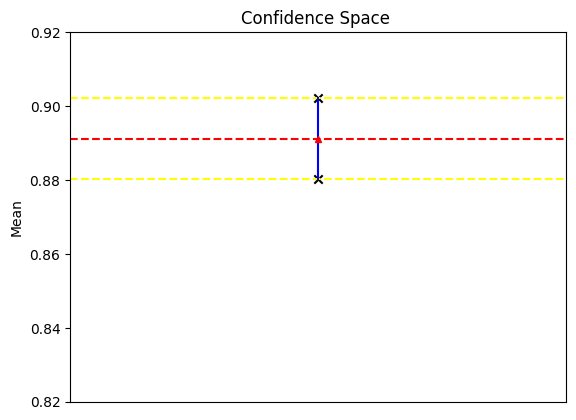

In [ ]:
plt.axhline(y=start, color='yellow', linestyle='--')
plt.axhline(y=end, color='yellow', linestyle='--')
plt.axhline(y=mean, color='red', linestyle='--')


plt.scatter(0, start ,marker='x', color = 'black')
plt.scatter(0, end ,marker='x', color = 'black')
plt.plot([0, 0], [start, end], color='blue')

plt.plot(0, mean, marker='^', markersize=5, color='red')
# Adding labels and title
plt.ylabel('Mean')
plt.title('Confidence Space ')

# Remove x-axis ticks and labels
plt.xticks([])

plt.ylim(0.82, 0.92)

# Display the plot
plt.show()